# 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/datathon'
FIFA_train = os.path.join(data_dir, "FIFA_train.csv")

In [3]:
train = pd.read_csv('FIFA_train.csv')
test = pd.read_csv('FIFA_test.csv')
submission = pd.read_csv('submission.csv')

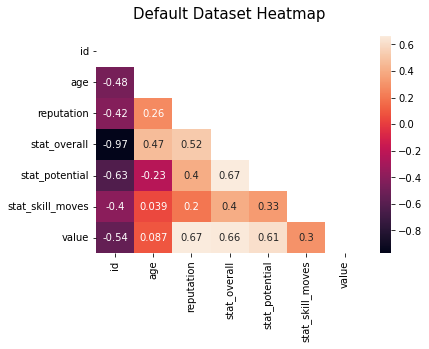

In [4]:
plt.title("Default Dataset Heatmap", y = 1.05, size = 15)

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), mask = mask, annot=True)

plt.show()

# 전처리

1. (기존 코드에 있던)로그변환
2. prefer_foot 컬럼 원핫인코딩
3. position을 기준으로 데이터셋을 분리하여 stat_skill_moves와 value간 상관계수 파악

### Log-Trasformation

In [5]:
train[['age', 'stat_potential']] = np.log1p(train[['age', 'stat_potential']])
test[['age', 'stat_potential']] = np.log1p(test[['age', 'stat_potential']])

### prefer_foot 원핫인코딩

Train Set

In [6]:
# 변수에 지정
X = train[['age', 'continent', 'contract_until', 'position', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']]
y = np.log1p(train['value'])

In [7]:
# 원핫인코딩
X = pd.get_dummies(columns = ['continent', 'position', 'prefer_foot'], data = X)

In [8]:
# 컬럼 정리(prefer_foot_right 컬럼을 삭제하고 prefer_foot_left의 이름을 prefer_foot으로 변경)
X.rename(columns={"prefer_foot_left":"prefer_foot"}, inplace=True)
del X['prefer_foot_right']
X.head()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot
0,3.465736,2021,5.0,94,4.553877,4.0,0,0,0,0,1,0,0,0,1,1
1,3.332205,2020,4.0,91,4.543295,1.0,0,0,1,0,0,0,1,0,0,0
2,3.465736,2021,5.0,91,4.521789,3.0,0,0,0,0,1,0,0,0,1,0
3,3.496508,2020,4.0,91,4.521789,3.0,0,0,1,0,0,1,0,0,0,0
4,3.258097,2021,3.0,90,4.543295,1.0,0,0,1,0,0,0,1,0,0,0


- - -

Test Set

In [9]:
# 변수에 지정
target = test[['age', 'continent', 'contract_until', 'position', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']]

In [10]:
# 원핫인코딩
target = pd.get_dummies(columns = ['continent', 'position', 'prefer_foot'], data = target)

In [11]:
# 컬럼 정리(prefer_foot_right 컬럼을 삭제하고 prefer_foot_left의 이름을 prefer_foot으로 변경)
target.rename(columns={"prefer_foot_left":"prefer_foot"}, inplace=True)
del target['prefer_foot_right']
target.head()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot
0,3.526361,2022,5.0,94,4.553877,5.0,0,0,1,0,0,0,0,0,1,0
1,3.295837,2022,5.0,92,4.543295,5.0,0,0,0,0,1,0,0,0,1,0
2,3.332205,2023,4.0,91,4.532599,4.0,0,0,1,0,0,0,0,1,0,0
3,3.332205,2020,4.0,91,4.521789,4.0,0,0,1,0,0,0,0,0,1,0
4,3.496508,2020,4.0,91,4.521789,4.0,0,0,1,0,0,0,0,1,0,0


### position을 기준으로 데이터셋을 분리하여 stat_skill_moves와 value간 상관계수 파악

In [12]:
# position을 기준으로 기존 데이터셋을 나누어 새로운 데이터프레임 생성
groups = train.groupby(train.position)
DF = groups.get_group("DF")
GK = groups.get_group("GK")
MF = groups.get_group("MF")
ST = groups.get_group("ST")

In [13]:
# 불필요한 컬럼 제거
DF.drop(['id', 'name', 'age', 'continent', 'contract_until', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'position'], axis='columns', inplace=True)
GK.drop(['id', 'name', 'age', 'continent', 'contract_until', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'position'], axis='columns', inplace=True)
MF.drop(['id', 'name', 'age', 'continent', 'contract_until', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'position'], axis='columns', inplace=True)
ST.drop(['id', 'name', 'age', 'continent', 'contract_until', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'position'], axis='columns', inplace=True)

DF.head()

,stat_skill_moves,value
3,3.0,51000000.0
5,2.0,44000000.0
13,2.0,27000000.0
20,3.0,46000000.0
24,2.0,57000000.0


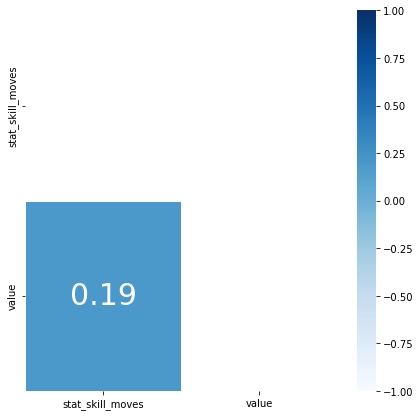

In [14]:
df = DF.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
colormap = plt.cm.Blues
sns.heatmap(df, 
            cmap = colormap, linewidths=0.5, linecolor = "white", mask = mask,
            vmin = -1, vmax = 1,
            annot = True, annot_kws = {"size" : 30})
 
plt.show()

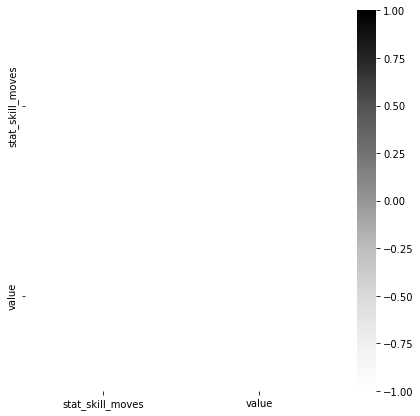

In [15]:
df = GK.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
colormap = plt.cm.Greys
sns.heatmap(df,
            cmap = colormap, linewidths=0.5, linecolor = "white", mask = mask,
            vmin = -1, vmax = 1,
            annot = True, annot_kws = {"size" : 30})
 
plt.show()

In [16]:
gk_df = GK.corr()
gk_df

,stat_skill_moves,value
stat_skill_moves,NaN,NaN
value,NaN,1.0


heatmap에 아무것도 보이지 않아 상관계수 값을 확인했더니 NaN값이었다.   
상관계수는 한 변수의 변동이 있을 때 다른 변수 또한 변동이 있어야 계산한 결과값이 나오는데,   
GK의 경우 stat_skill_moves가 1로 전부 동일하기 때문에(값에 변동이 없기 때문에) 계산이 되지 않고 NaN값이 나왔다.

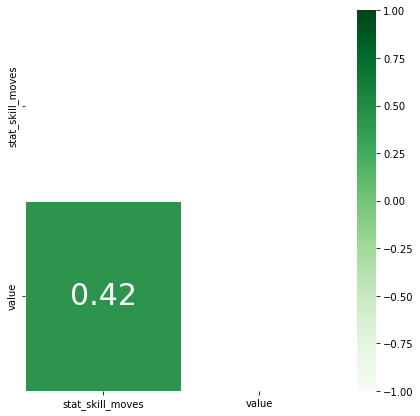

In [17]:
df = MF.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
colormap = plt.cm.Greens
sns.heatmap(df,
            cmap = colormap, linewidths=0.5, linecolor = "white", mask = mask,
            vmin = -1, vmax = 1,
            annot = True, annot_kws = {"size" : 30})
 
plt.show()

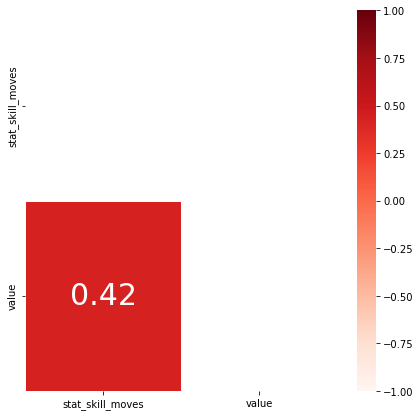

In [18]:
df = ST.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
colormap = plt.cm.Reds
sns.heatmap(df,
            cmap = colormap, linewidths=0.5, linecolor = "white", mask = mask,
            vmin = -1, vmax = 1,
            annot = True, annot_kws = {"size" : 30})
 
plt.show()